In [4]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


Note: you may need to restart the kernel to use updated packages.


In [114]:
import numpy
import xgboost as XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [115]:
# load data
dataset = numpy.loadtxt('pima-indians-diabetes.csv', delimiter=",")

In [116]:
print(dataset)

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


In [117]:
dataset.shape

(768, 9)

In [118]:
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]

In [119]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [120]:
X_train.shape

(514, 8)

In [121]:
y_train.shape

(514,)

In [122]:
# fit model no training data
model = xgboost.XGBClassifier(booster='dart',
                                  max_depth=10,
                                  gamma=0)
model.fit(X_train, y_train, eval_metric=['auc', 'error'])

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [125]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [126]:
model.score(X_test, y_test)


0.7362204724409449

In [127]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print(precision_score(y_test, model.predict(X_test)))
print(accuracy_score(y_pred, y_test))

0.6506024096385542
0.7362204724409449


In [128]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 73.62%


In [129]:
import xgboost as xgb
model = xgb.XGBClassifier()
gbm = model.fit(X_train, y_train)
gbm.score(X_test, y_test)

0.7401574803149606

In [130]:
from sklearn.model_selection import cross_validate, GridSearchCV

params = {'n_estimators':[10, 20, 50, 100],
          'reg_lambda':[2, 1],
          'gamma':[0,0.3,0.2,0.1],
          'max_depth':list(range(3, 6)), 
          'learning_rate':[0.001,0.002,0.003,0.004,0.005],
          'min_child_weight ':[1, 3, 5, 7, 9],
}
clf=GridSearchCV(model, params, cv=10, n_jobs=-1, verbose=1)
clf.fit(X_train, y_train)

Fitting 10 folds for each of 2400 candidates, totalling 24000 fits
[19:24:29] WARNING: /workspace/src/learner.cc:480: 
Parameters: { min_child_weight  } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[19:24:29] WARNING: /workspace/src/learner.cc:480: 
Parameters: { min_child_weight  } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:24:29] WARNING: /workspace/src/learner.cc:480: 
Parameters: { min_child_weight  } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:24:29] WARNING: /workspace/src/learner.cc:480: 
Parameters: { min_child_weight  } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open a

[19:24:30] WARNING: /workspace/src/learner.cc:480: 
Parameters: { min_child_weight  } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:24:30] WARNING: /workspace/src/learner.cc:480: 
Parameters: { min_child_weight  } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[19:24:30] WARNING: /workspace/src/learner.cc:480: 
Parameters: { min_child_weight  } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:24:30] WARNING: /workspace/src/learner.cc:480: 
Parameters: { min_child_weight  } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:24:30] WARNING: /workspace/src/learner.cc:480: 
Parameters: { min_child_weight  } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open a

[19:24:30] WARNING: /workspace/src/learner.cc:480: 
Parameters: { min_child_weight  } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:24:30] WARNING: /workspace/src/learner.cc:480: 
Parameters: { min_child_weight  } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:24:30] WARNING: /workspace/src/learner.cc:480: 
Parameters: { min_child_weight  } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open a

[19:24:31] WARNING: /workspace/src/learner.cc:480: 
Parameters: { min_child_weight  } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:24:31] WARNING: /workspace/src/learner.cc:480: 
Parameters: { min_child_weight  } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:24:31] WARNING: /workspace/src/learner.cc:480: 
Parameters: { min_child_weight  } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open a

[19:24:32] WARNING: /workspace/src/learner.cc:480: 
Parameters: { min_child_weight  } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:24:32] WARNING: /workspace/src/learner.cc:480: 
Parameters: { min_child_weight  } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[19:24:32] WARNING: /workspace/src/learner.cc:480: 
Parameters: { min_child_weight  } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




KeyboardInterrupt: 

In [131]:
from sklearn.model_selection import RandomizedSearchCV

params = {'n_estimators': [10, 20, 50, 100,300],
          'max_depth': [3,5,7,10,20],
          'objective': ['binary:logistic'],
          'min_child_weight': [1, 5, 10],
          'gamma': [0.5, 1, 1.5, 2],
          }

rfc_cv = RandomizedSearchCV(model, params, cv = 10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END gamma=0.5, max_depth=7, min_child_weight=10, n_estimators=50, objective=binary:logistic; total time=   0.0s
[CV] END gamma=0.5, max_depth=7, min_child_weight=10, n_estimators=50, objective=binary:logistic; total time=   0.0s
[CV] END gamma=0.5, max_depth=7, min_child_weight=10, n_estimators=50, objective=binary:logistic; total time=   0.1s


[CV] END gamma=0.5, max_depth=7, min_child_weight=10, n_estimators=50, objective=binary:logistic; total time=   0.1s
[CV] END gamma=0.5, max_depth=7, min_child_weight=10, n_estimators=50, objective=binary:logistic; total time=   0.1s
[CV] END gamma=0.5, max_depth=7, min_child_weight=10, n_estimators=50, objective=binary:logistic; total time=   0.0s


[CV] END gamma=0.5, max_depth=7, min_child_weight=10, n_estimators=50, objective=binary:logistic; total time=   0.1s
[CV] END gamma=0.5, max_depth=7, min_child_weight=10, n_estimators=50, objective=binary:logistic; total time=   0.1s
[CV] END gamma=0.5, max_depth=7, min_child_weight=10, n_estimators=50, objective=binary:logistic; total time=   0.1s


[CV] END gamma=0.5, max_depth=7, min_child_weight=10, n_estimators=50, objective=binary:logistic; total time=   0.1s
[CV] END gamma=2, max_depth=7, min_child_weight=10, n_estimators=10, objective=binary:logistic; total time=   0.0s
[CV] END gamma=2, max_depth=7, min_child_weight=10, n_estimators=10, objective=binary:logistic; total time=   0.1s
[CV] END gamma=2, max_depth=7, min_child_weight=10, n_estimators=10, objective=binary:logistic; total time=   0.0s
[CV] END gamma=2, max_depth=7, min_child_weight=10, n_estimators=10, objective=binary:logistic; total time=   0.0s


[CV] END gamma=2, max_depth=7, min_child_weight=10, n_estimators=10, objective=binary:logistic; total time=   0.1s
[CV] END gamma=2, max_depth=7, min_child_weight=10, n_estimators=10, objective=binary:logistic; total time=   0.1s
[CV] END gamma=2, max_depth=7, min_child_weight=10, n_estimators=10, objective=binary:logistic; total time=   0.0s
[CV] END gamma=2, max_depth=7, min_child_weight=10, n_estimators=10, objective=binary:logistic; total time=   0.0s
[CV] END gamma=2, max_depth=7, min_child_weight=10, n_estimators=10, objective=binary:logistic; total time=   0.0s
[CV] END gamma=2, max_depth=7, min_child_weight=10, n_estimators=10, objective=binary:logistic; total time=   0.0s


[CV] END gamma=1, max_depth=3, min_child_weight=5, n_estimators=50, objective=binary:logistic; total time=   0.1s
[CV] END gamma=1, max_depth=3, min_child_weight=5, n_estimators=50, objective=binary:logistic; total time=   0.1s
[CV] END gamma=1, max_depth=3, min_child_weight=5, n_estimators=50, objective=binary:logistic; total time=   0.1s


[CV] END gamma=1, max_depth=3, min_child_weight=5, n_estimators=50, objective=binary:logistic; total time=   0.1s
[CV] END gamma=1, max_depth=3, min_child_weight=5, n_estimators=50, objective=binary:logistic; total time=   0.1s
[CV] END gamma=1, max_depth=3, min_child_weight=5, n_estimators=50, objective=binary:logistic; total time=   0.0s


[CV] END gamma=1, max_depth=3, min_child_weight=5, n_estimators=50, objective=binary:logistic; total time=   0.1s
[CV] END gamma=1, max_depth=3, min_child_weight=5, n_estimators=50, objective=binary:logistic; total time=   0.1s
[CV] END gamma=1, max_depth=3, min_child_weight=5, n_estimators=50, objective=binary:logistic; total time=   0.1s


[CV] END gamma=1, max_depth=3, min_child_weight=5, n_estimators=50, objective=binary:logistic; total time=   0.1s
[CV] END gamma=1.5, max_depth=3, min_child_weight=5, n_estimators=100, objective=binary:logistic; total time=   0.1s


[CV] END gamma=1.5, max_depth=3, min_child_weight=5, n_estimators=100, objective=binary:logistic; total time=   0.2s
[CV] END gamma=1.5, max_depth=3, min_child_weight=5, n_estimators=100, objective=binary:logistic; total time=   0.1s


[CV] END gamma=1.5, max_depth=3, min_child_weight=5, n_estimators=100, objective=binary:logistic; total time=   0.1s
[CV] END gamma=1.5, max_depth=3, min_child_weight=5, n_estimators=100, objective=binary:logistic; total time=   0.2s
[CV] END gamma=1.5, max_depth=3, min_child_weight=5, n_estimators=100, objective=binary:logistic; total time=   0.1s
[CV] END gamma=1.5, max_depth=3, min_child_weight=5, n_estimators=100, objective=binary:logistic; total time=   0.1s


[CV] END gamma=1.5, max_depth=3, min_child_weight=5, n_estimators=100, objective=binary:logistic; total time=   0.1s
[CV] END gamma=1.5, max_depth=3, min_child_weight=5, n_estimators=100, objective=binary:logistic; total time=   0.1s
[CV] END gamma=1.5, max_depth=3, min_child_weight=5, n_estimators=100, objective=binary:logistic; total time=   0.1s


[CV] END gamma=0.5, max_depth=10, min_child_weight=10, n_estimators=100, objective=binary:logistic; total time=   0.3s
[CV] END gamma=0.5, max_depth=10, min_child_weight=10, n_estimators=100, objective=binary:logistic; total time=   0.1s


[CV] END gamma=0.5, max_depth=10, min_child_weight=10, n_estimators=100, objective=binary:logistic; total time=   0.1s
[CV] END gamma=0.5, max_depth=10, min_child_weight=10, n_estimators=100, objective=binary:logistic; total time=   0.3s
[CV] END gamma=0.5, max_depth=10, min_child_weight=10, n_estimators=100, objective=binary:logistic; total time=   0.1s


[CV] END gamma=0.5, max_depth=10, min_child_weight=10, n_estimators=100, objective=binary:logistic; total time=   0.1s
[CV] END gamma=0.5, max_depth=10, min_child_weight=10, n_estimators=100, objective=binary:logistic; total time=   0.2s


[CV] END gamma=0.5, max_depth=10, min_child_weight=10, n_estimators=100, objective=binary:logistic; total time=   0.2s
[CV] END gamma=0.5, max_depth=10, min_child_weight=10, n_estimators=100, objective=binary:logistic; total time=   0.1s


[CV] END gamma=0.5, max_depth=10, min_child_weight=10, n_estimators=100, objective=binary:logistic; total time=   0.1s
[CV] END gamma=0.5, max_depth=7, min_child_weight=5, n_estimators=50, objective=binary:logistic; total time=   0.1s
[CV] END gamma=0.5, max_depth=7, min_child_weight=5, n_estimators=50, objective=binary:logistic; total time=   0.1s
[CV] END gamma=0.5, max_depth=7, min_child_weight=5, n_estimators=50, objective=binary:logistic; total time=   0.1s


[CV] END gamma=0.5, max_depth=7, min_child_weight=5, n_estimators=50, objective=binary:logistic; total time=   0.1s
[CV] END gamma=0.5, max_depth=7, min_child_weight=5, n_estimators=50, objective=binary:logistic; total time=   0.1s


[CV] END gamma=0.5, max_depth=7, min_child_weight=5, n_estimators=50, objective=binary:logistic; total time=   0.3s
[CV] END gamma=0.5, max_depth=7, min_child_weight=5, n_estimators=50, objective=binary:logistic; total time=   0.1s


[CV] END gamma=0.5, max_depth=7, min_child_weight=5, n_estimators=50, objective=binary:logistic; total time=   0.1s
[CV] END gamma=0.5, max_depth=7, min_child_weight=5, n_estimators=50, objective=binary:logistic; total time=   0.2s


[CV] END gamma=0.5, max_depth=7, min_child_weight=5, n_estimators=50, objective=binary:logistic; total time=   0.1s


[CV] END gamma=1, max_depth=7, min_child_weight=10, n_estimators=300, objective=binary:logistic; total time=   1.1s


[CV] END gamma=1, max_depth=7, min_child_weight=10, n_estimators=300, objective=binary:logistic; total time=   0.4s


[CV] END gamma=1, max_depth=7, min_child_weight=10, n_estimators=300, objective=binary:logistic; total time=   0.3s


[CV] END gamma=1, max_depth=7, min_child_weight=10, n_estimators=300, objective=binary:logistic; total time=   0.3s


[CV] END gamma=1, max_depth=7, min_child_weight=10, n_estimators=300, objective=binary:logistic; total time=   0.3s


[CV] END gamma=1, max_depth=7, min_child_weight=10, n_estimators=300, objective=binary:logistic; total time=   0.3s


[CV] END gamma=1, max_depth=7, min_child_weight=10, n_estimators=300, objective=binary:logistic; total time=   0.3s


[CV] END gamma=1, max_depth=7, min_child_weight=10, n_estimators=300, objective=binary:logistic; total time=   0.3s


[CV] END gamma=1, max_depth=7, min_child_weight=10, n_estimators=300, objective=binary:logistic; total time=   0.3s


[CV] END gamma=1, max_depth=7, min_child_weight=10, n_estimators=300, objective=binary:logistic; total time=   0.4s
[CV] END gamma=1, max_depth=20, min_child_weight=10, n_estimators=50, objective=binary:logistic; total time=   0.1s
[CV] END gamma=1, max_depth=20, min_child_weight=10, n_estimators=50, objective=binary:logistic; total time=   0.1s
[CV] END gamma=1, max_depth=20, min_child_weight=10, n_estimators=50, objective=binary:logistic; total time=   0.0s


[CV] END gamma=1, max_depth=20, min_child_weight=10, n_estimators=50, objective=binary:logistic; total time=   0.1s
[CV] END gamma=1, max_depth=20, min_child_weight=10, n_estimators=50, objective=binary:logistic; total time=   0.1s
[CV] END gamma=1, max_depth=20, min_child_weight=10, n_estimators=50, objective=binary:logistic; total time=   0.1s
[CV] END gamma=1, max_depth=20, min_child_weight=10, n_estimators=50, objective=binary:logistic; total time=   0.0s


[CV] END gamma=1, max_depth=20, min_child_weight=10, n_estimators=50, objective=binary:logistic; total time=   0.1s
[CV] END gamma=1, max_depth=20, min_child_weight=10, n_estimators=50, objective=binary:logistic; total time=   0.1s
[CV] END gamma=1, max_depth=20, min_child_weight=10, n_estimators=50, objective=binary:logistic; total time=   0.0s


[CV] END gamma=1.5, max_depth=20, min_child_weight=10, n_estimators=100, objective=binary:logistic; total time=   0.1s
[CV] END gamma=1.5, max_depth=20, min_child_weight=10, n_estimators=100, objective=binary:logistic; total time=   0.1s


[CV] END gamma=1.5, max_depth=20, min_child_weight=10, n_estimators=100, objective=binary:logistic; total time=   0.1s
[CV] END gamma=1.5, max_depth=20, min_child_weight=10, n_estimators=100, objective=binary:logistic; total time=   0.1s
[CV] END gamma=1.5, max_depth=20, min_child_weight=10, n_estimators=100, objective=binary:logistic; total time=   0.1s
[CV] END gamma=1.5, max_depth=20, min_child_weight=10, n_estimators=100, objective=binary:logistic; total time=   0.1s


[CV] END gamma=1.5, max_depth=20, min_child_weight=10, n_estimators=100, objective=binary:logistic; total time=   0.2s
[CV] END gamma=1.5, max_depth=20, min_child_weight=10, n_estimators=100, objective=binary:logistic; total time=   0.2s


[CV] END gamma=1.5, max_depth=20, min_child_weight=10, n_estimators=100, objective=binary:logistic; total time=   0.1s
[CV] END gamma=1.5, max_depth=20, min_child_weight=10, n_estimators=100, objective=binary:logistic; total time=   0.2s


[CV] END gamma=2, max_depth=10, min_child_weight=1, n_estimators=100, objective=binary:logistic; total time=   0.3s


[CV] END gamma=2, max_depth=10, min_child_weight=1, n_estimators=100, objective=binary:logistic; total time=   0.3s


[CV] END gamma=2, max_depth=10, min_child_weight=1, n_estimators=100, objective=binary:logistic; total time=   0.2s
[CV] END gamma=2, max_depth=10, min_child_weight=1, n_estimators=100, objective=binary:logistic; total time=   0.3s


[CV] END gamma=2, max_depth=10, min_child_weight=1, n_estimators=100, objective=binary:logistic; total time=   0.3s


[CV] END gamma=2, max_depth=10, min_child_weight=1, n_estimators=100, objective=binary:logistic; total time=   0.2s
[CV] END gamma=2, max_depth=10, min_child_weight=1, n_estimators=100, objective=binary:logistic; total time=   0.2s


[CV] END gamma=2, max_depth=10, min_child_weight=1, n_estimators=100, objective=binary:logistic; total time=   0.4s
[CV] END gamma=2, max_depth=10, min_child_weight=1, n_estimators=100, objective=binary:logistic; total time=   0.2s


[CV] END gamma=2, max_depth=10, min_child_weight=1, n_estimators=100, objective=binary:logistic; total time=   0.2s


In [132]:
rfc_cv

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=0,
                                           num_parallel_tree=1, random_state=0,
                                           reg_alpha=0, reg_lambda=1,
                                      

In [134]:
model = xgboost.XGBClassifier(cv=10,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=0,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=0,
                                           num_parallel_tree=1, random_state=0,
                                           reg_alpha=0, reg_lambda=1,
                                           scale_pos_weight=1, subsample=1,
                                           tree_method='exact',
                                           validate_parameters=1,
                                           verbosity=None),
                   n_jobs=-1,
                   param_distributions={'gamma': [0.5, 1, 1.5, 2],
                                        'max_depth': [3, 5, 7, 10, 20],
                                        'min_child_weight': [1, 5, 10],
                                        'n_estimators': [10, 20, 50, 100, 300],
                                        'objective': ['binary:logistic']},
                   verbose=2)

random = model.fit(X_train, y_train)
random.score(X_test, y_test)

[19:28:02] WARNING: /workspace/src/learner.cc:480: 
Parameters: { cv, estimator, param_distributions, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




0.7401574803149606

In [135]:
y_pred=random.predict(X_train)
t_pred=random.predict(X_test)
print(accuracy_score(y_pred, y_train))
print(accuracy_score(t_pred, y_test))
print(random.feature_importances_)

1.0
0.7401574803149606
[0.08907107 0.23959671 0.08799455 0.09824965 0.09801765 0.15170811
 0.09959184 0.13577047]


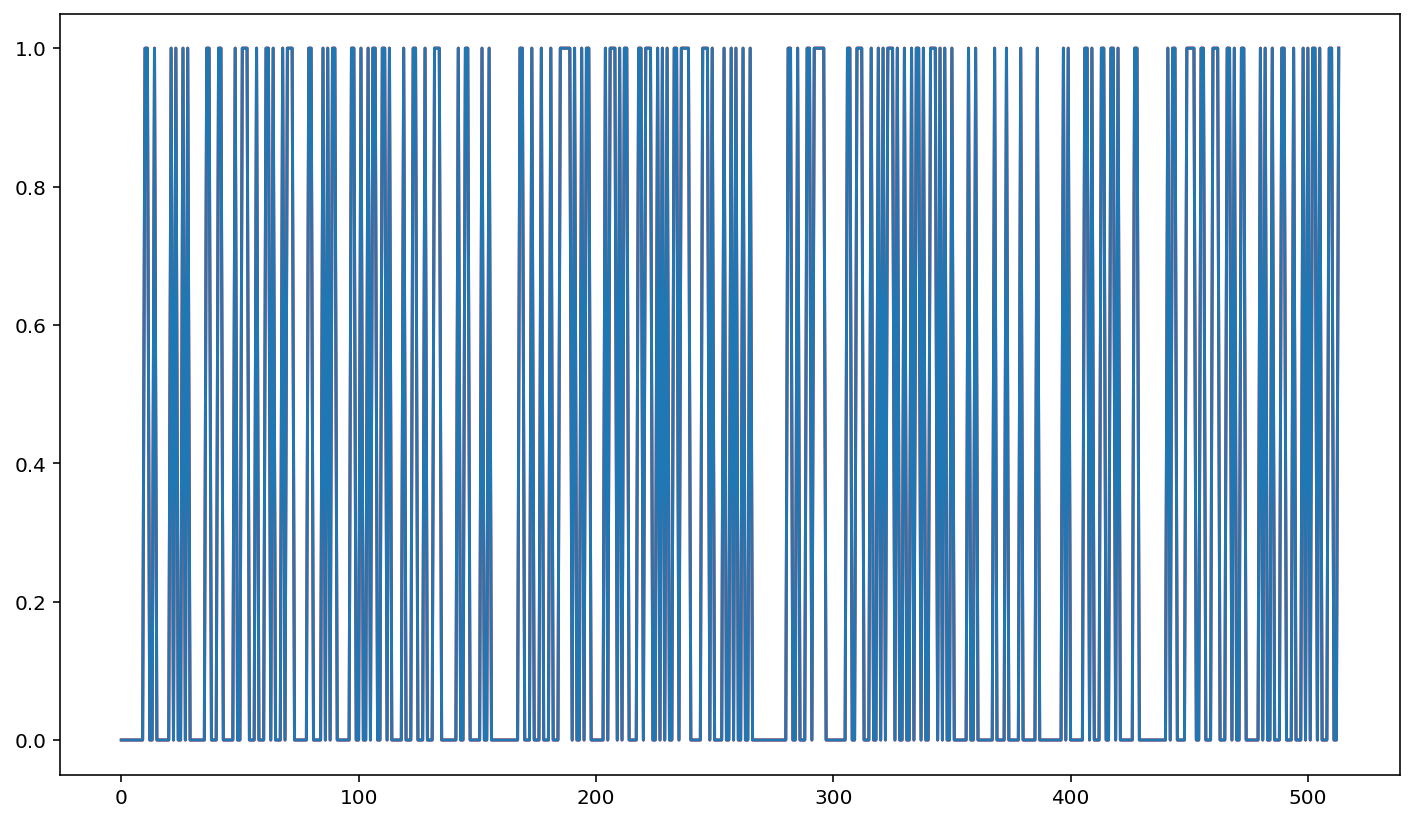

In [136]:
import matplotlib.pyplot as plt

plt.plot(y_pred, color = 'red')
plt.plot(y_train)

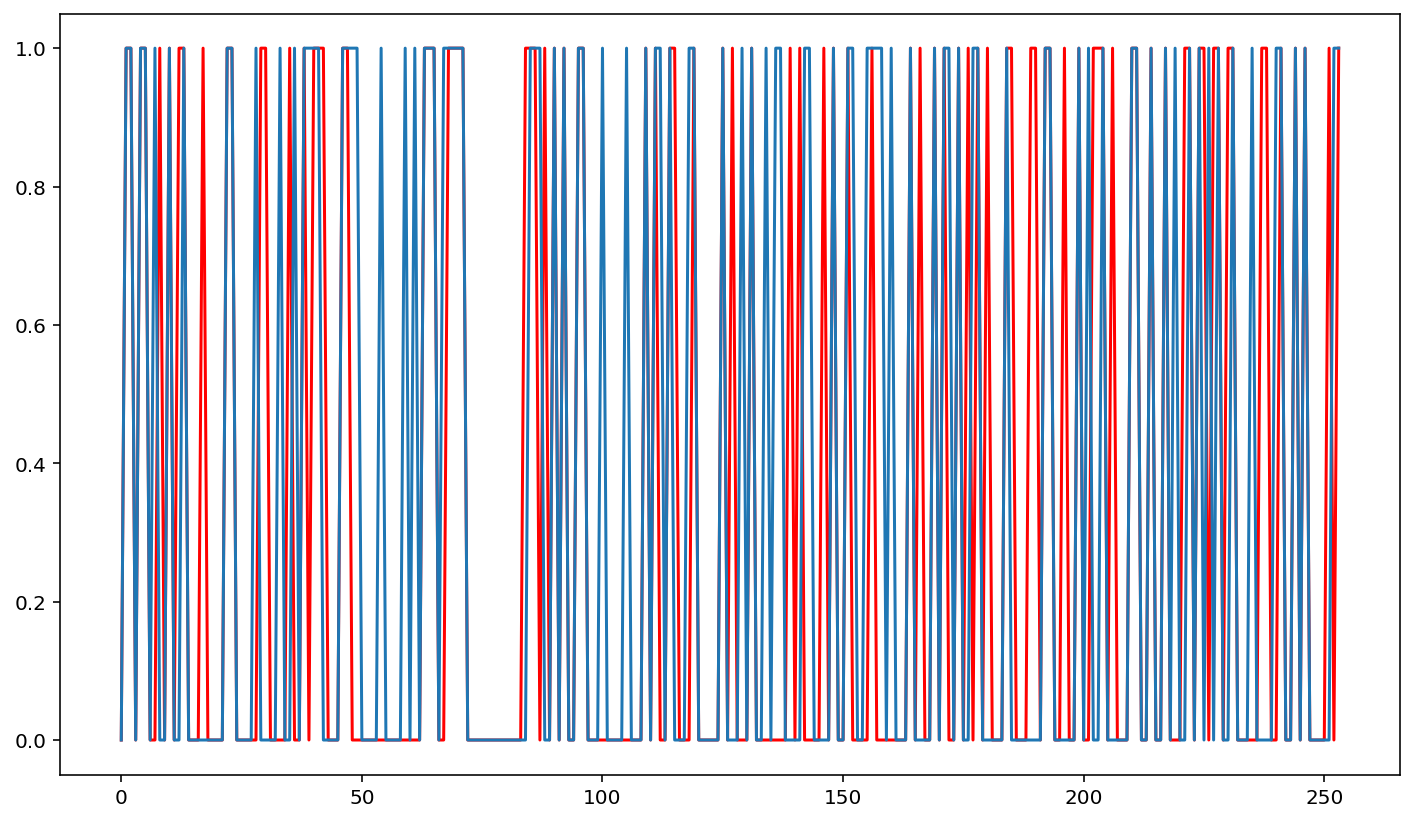

In [137]:
plt.plot(t_pred, color = 'red')
plt.plot(y_test)